## BAP Exam 2


In [1]:
# run this block to avoid extraneous output
import warnings
warnings.filterwarnings("ignore")

### Problem 1 - Web Data

```
<catalog>
   <book id="bk101">
      <author>Gambardella, Matthew</author>
      <title>XML Developer's Guide</title>
      <genre>Computer</genre>
      <price>44.95</price>
      <publish_date>2000-10-01</publish_date>
      <description>An in-depth look at creating applications 
      with XML.</description>
   </book>
   .
   .
   .
</catalog>
```
Suppose you are tasked with writing a function to extract only the **titles** and **prices** for these books.  The function should organize the data into a list of tuples. Return the data object created. The expected output is:

```
[("XML Developer's Guide", '44.95'),
 ('Midnight Rain', '5.95'),
 ('Maeve Ascendant', '5.95'),
 ("Oberon's Legacy", '5.95'),
 ('The Sundered Grail', '5.95')]
```

In [ ]:
def extract(data):
    from lxml import etree
    # YOUR CODE
    root=etree.XML(data)
    lis1=[]
    for element in root.iter('book'):
        tup1=(element.find('title').text, element.find('price').text)
        lis1.append(tup1)
    return lis1

    

In [ ]:
#Run this block to import the data
xml_data='''
<catalog>
   <book id="bk101">
      <author>Gambardella, Matthew</author>
      <title>XML Developer's Guide</title>
      <genre>Computer</genre>
      <price>44.95</price>
      <publish_date>2000-10-01</publish_date>
      <description>An in-depth look at creating applications 
      with XML.</description>
   </book>
   <book id="bk102">
      <author>Ralls, Kim</author>
      <title>Midnight Rain</title>
      <genre>Fantasy</genre>
      <price>5.95</price>
      <publish_date>2000-12-16</publish_date>
      <description>A former architect battles corporate zombies, 
      an evil sorceress, and her own childhood to become queen 
      of the world.</description>
   </book>
   <book id="bk103">
      <author>Corets, Eva</author>
      <title>Maeve Ascendant</title>
      <genre>Fantasy</genre>
      <price>5.95</price>
      <publish_date>2000-11-17</publish_date>
      <description>After the collapse of a nanotechnology 
      society in England, the young survivors lay the 
      foundation for a new society.</description>
   </book>
   <book id="bk104">
      <author>Corets, Eva</author>
      <title>Oberon's Legacy</title>
      <genre>Fantasy</genre>
      <price>5.95</price>
      <publish_date>2001-03-10</publish_date>
      <description>In post-apocalypse England, the mysterious 
      agent known only as Oberon helps to create a new life 
      for the inhabitants of London. Sequel to Maeve 
      Ascendant.</description>
   </book>
   <book id="bk105">
      <author>Corets, Eva</author>
      <title>The Sundered Grail</title>
      <genre>Fantasy</genre>
      <price>5.95</price>
      <publish_date>2001-09-10</publish_date>
      <description>The two daughters of Maeve, half-sisters, 
      battle one another for control of England. Sequel to 
      Oberon's Legacy.</description>
   </book>
</catalog>
'''

In [ ]:
# Run the function
extract(xml_data)

[("XML Developer's Guide", '44.95'),
 ('Midnight Rain', '5.95'),
 ('Maeve Ascendant', '5.95'),
 ("Oberon's Legacy", '5.95'),
 ('The Sundered Grail', '5.95')]

### Problem 2 Web-scraping
[CNN Business](https://web.archive.org/web/20211001184331/https://money.cnn.com/data/markets/) maintains an up-to-date snap-shot of stock activity.  Build a function to extract the data in the table labeled "Most Popular".  

![Most Popular](https://drive.google.com/uc?id=1gYCkU8sCRH4oI1qHg-FAv34VA_CxgwUF)

Your function should ***return*** a list of tuples. The expected output is:
```
[('Alibaba Group Holding Ltd', '171.70', '6.61%'),
 ("Macy's Inc", '23.48', '4.45%'),
 ('Southwest Airlines Co', '50.81', '4.30%'),
 ('Pfizer Inc', '48.39', '-3.08%'),
 ('General Motors Co', '49.55', '2.84%')]
```


As part of this problem you will need to closely examine the elements in the table and the corresponding html in order to reference the exact tag and class combinations. Here is one example. 
![stocks](https://drive.google.com/uc?id=1IfEFnU4aA63hEKE2rt9A-cuewVOhmQQY)

In [ ]:
def most_popular(url):
    # your code
    import requests
    from bs4 import BeautifulSoup
    # YOUR CODE
    response=requests.get(url)
    results_page=BeautifulSoup(response.content, 'lxml')
    stocks=results_page.find_all('li', class_="row first")
    lst1=[]
    
    for element in stocks:
        NameOfStock=element.find('span', class_="column stock-name").get_text() 
        PriceOfStock=element.find('span',class_="column stock-price").get_text()
        ChangeInStock=element.find('span',class_="column stock-change").get_text() 
        stocktupl=(NameOfStock,PriceOfStock,ChangeInStock)
        lst1.append(stocktupl)
            
    return lst1
     

    



In [ ]:
# run the function using the time-stamped url
u='https://web.archive.org/web/20211001184331/https://money.cnn.com/data/markets/'
most_popular(u)

[('Alibaba Group Holding Ltd', '171.70', '6.61%'),
 ("Macy's Inc", '23.48', '4.45%'),
 ('Southwest Airlines Co', '50.81', '4.30%'),
 ('Pfizer Inc', '48.39', '-3.08%'),
 ('General Motors Co', '49.55', '2.84%')]

### Problem 3 Databases with Python

Here it is again, a visual of the customers database. 
![customers](https://drive.google.com/uc?id=1ge-G3RxhfF8z8qo6fYSum6XX1f4djiqN)
Our first step will be to build the database using the SQLite3 library. There is no code to fill in here, simply run the code block below and scroll down to the exercises. 

### Run this code block. Only do this once per session. 
# ↓

In [2]:
#@title
import sqlite3
conn=sqlite3.connect('customers.db')
# cursor tells the database what to do
c=conn.cursor()

# CATEGORIES TABLE
# create a table using a docstring (allows multiple lines)
c.execute("""CREATE TABLE `categories` (
  `CategoryID` int(11) NOT NULL PRIMARY KEY,
  `CategoryName` varchar(255) DEFAULT NULL,
  `Description` varchar(255) DEFAULT NULL
) """)

# commit the connection
conn.commit()

category_contents=[
(1, 'Beverages', 'Soft drinks, coffees, teas, beers, and ales'),
(2, 'Condiments', 'Sweet and savory sauces, relishes, spreads, and seasonings'),
(3, 'Confections', 'Desserts, candies, and sweet breads'),
(4, 'Dairy Products', 'Cheeses'),
(5, 'Grains/Cereals', 'Breads, crackers, pasta, and cereal'),
(6, 'Meat/Poultry', 'Prepared meats'),
(7, 'Produce', 'Dried fruit and bean curd'),
(8, 'Seafood', 'Seaweed and fish')
]

c.executemany("INSERT INTO categories VALUES (?,?,?)",category_contents)
conn.commit()

# CUSTOMERS TABLE
# create a table using a docstring (allows multiple lines)
c.execute("""CREATE TABLE `customers` (
  `CustomerID` int(11) NOT NULL PRIMARY KEY,
  `CustomerName` varchar(255) DEFAULT NULL,
  `ContactName` varchar(255) DEFAULT NULL,
  `Address` varchar(255) DEFAULT NULL,
  `City` varchar(255) DEFAULT NULL,
  `PostalCode` varchar(255) DEFAULT NULL,
  `Country` varchar(255) DEFAULT NULL
) """)

# commit the connection
conn.commit()

customer_contents=[
(1, 'Alfreds Futterkiste', 'Maria Anders', 'Obere Str. 57', 'Berlin', '12209', 'Germany'),
(2, 'Ana Trujillo Emparedados y helados', 'Ana Trujillo', 'Avda. de la Constitución 2222', 'México D.F.', '05021', 'Mexico'),
(3, 'Antonio Moreno Taquería', 'Antonio Moreno', 'Mataderos 2312', 'México D.F.', '05023', 'Mexico'),
(4, 'Around the Horn', 'Thomas Hardy', '120 Hanover Sq.', 'London', 'WA1 1DP', 'UK'),
(5, 'Berglunds snabbköp', 'Christina Berglund', 'Berguvsvägen 8', 'Luleå', 'S-958 22', 'Sweden'),
(6, 'Blauer See Delikatessen', 'Hanna Moos', 'Forsterstr. 57', 'Mannheim', '68306', 'Germany'),
(7, 'Blondel père et fils', 'Frédérique Citeaux', '24, place Kléber', 'Strasbourg', '67000', 'France'),
(8, 'Bólido Comidas preparadas', 'Martín Sommer', 'C/ Araquil, 67', 'Madrid', '28023', 'Spain'),
(9, 'Bon app\'', 'Laurence Lebihans', '12, rue des Bouchers', 'Marseille', '13008', 'France'),
(10, 'Bottom-Dollar Marketse', 'Elizabeth Lincoln', '23 Tsawassen Blvd.', 'Tsawassen', 'T2F 8M4', 'Canada'),
(11, 'B\'s Beverages', 'Victoria Ashworth', 'Fauntleroy Circus', 'London', 'EC2 5NT', 'UK'),
(12, 'Cactus Comidas para llevar', 'Patricio Simpson', 'Cerrito 333', 'Buenos Aires', '1010', 'Argentina'),
(13, 'Centro comercial Moctezuma', 'Francisco Chang', 'Sierras de Granada 9993', 'México D.F.', '05022', 'Mexico'),
(14, 'Chop-suey Chinese', 'Yang Wang', 'Hauptstr. 29', 'Bern', '3012', 'Switzerland'),
(15, 'Comércio Mineiro', 'Pedro Afonso', 'Av. dos Lusíadas, 23', 'São Paulo', '05432-043', 'Brazil'),
(16, 'Consolidated Holdings', 'Elizabeth Brown', 'Berkeley Gardens 12 Brewery', 'London', 'WX1 6LT', 'UK'),
(17, 'Drachenblut Delikatessend', 'Sven Ottlieb', 'Walserweg 21', 'Aachen', '52066', 'Germany'),
(18, 'Du monde entier', 'Janine Labrune', '67, rue des Cinquante Otages', 'Nantes', '44000', 'France'),
(19, 'Eastern Connection', 'Ann Devon', '35 King George', 'London', 'WX3 6FW', 'UK'),
(20, 'Ernst Handel', 'Roland Mendel', 'Kirchgasse 6', 'Graz', '8010', 'Austria'),
(21, 'Familia Arquibaldo', 'Aria Cruz', 'Rua Orós, 92', 'São Paulo', '05442-030', 'Brazil'),
(22, 'FISSA Fabrica Inter. Salchichas S.A.', 'Diego Roel', 'C/ Moralzarzal, 86', 'Madrid', '28034', 'Spain'),
(23, 'Folies gourmandes', 'Martine Rancé', '184, chaussée de Tournai', 'Lille', '59000', 'France'),
(24, 'Folk och fä HB', 'Maria Larsson', 'Åkergatan 24', 'Bräcke', 'S-844 67', 'Sweden'),
(25, 'Frankenversand', 'Peter Franken', 'Berliner Platz 43', 'München', '80805', 'Germany'),
(26, 'France restauration', 'Carine Schmitt', '54, rue Royale', 'Nantes', '44000', 'France'),
(27, 'Franchi S.p.A.', 'Paolo Accorti', 'Via Monte Bianco 34', 'Torino', '10100', 'Italy'),
(28, 'Furia Bacalhau e Frutos do Mar', 'Lino Rodriguez', 'Jardim das rosas n. 32', 'Lisboa', '1675', 'Portugal'),
(29, 'Galería del gastrónomo', 'Eduardo Saavedra', 'Rambla de Cataluña, 23', 'Barcelona', '08022', 'Spain'),
(30, 'Godos Cocina Típica', 'José Pedro Freyre', 'C/ Romero, 33', 'Sevilla', '41101', 'Spain'),
(31, 'Gourmet Lanchonetes', 'André Fonseca', 'Av. Brasil, 442', 'Campinas', '04876-786', 'Brazil'),
(32, 'Great Lakes Food Market', 'Howard Snyder', '2732 Baker Blvd.', 'Eugene', '97403', 'USA'),
(33, 'GROSELLA-Restaurante', 'Manuel Pereira', '5ª Ave. Los Palos Grandes', 'Caracas', '1081', 'Venezuela'),
(34, 'Hanari Carnes', 'Mario Pontes', 'Rua do Paço, 67', 'Rio de Janeiro', '05454-876', 'Brazil'),
(35, 'HILARIÓN-Abastos', 'Carlos Hernández', 'Carrera 22 con Ave. Carlos Soublette #8-35', 'San Cristóbal', '5022', 'Venezuela'),
(36, 'Hungry Coyote Import Store', 'Yoshi Latimer', 'City Center Plaza 516 Main St.', 'Elgin', '97827', 'USA'),
(37, 'Hungry Owl All-Night Grocers', 'Patricia McKenna', '8 Johnstown Road', 'Cork', '', 'Ireland'),
(38, 'Island Trading', 'Helen Bennett', 'Garden House Crowther Way', 'Cowes', 'PO31 7PJ', 'UK'),
(39, 'Königlich Essen', 'Philip Cramer', 'Maubelstr. 90', 'Brandenburg', '14776', 'Germany'),
(40, 'La corne d\'abondance', 'Daniel Tonini', '67, avenue de l\'Europe', 'Versailles', '78000', 'France'),
(41, 'La maison d\'Asie', 'Annette Roulet', '1 rue Alsace-Lorraine', 'Toulouse', '31000', 'France'),
(42, 'Laughing Bacchus Wine Cellars', 'Yoshi Tannamuri', '1900 Oak St.', 'Vancouver', 'V3F 2K1', 'Canada'),
(43, 'Lazy K Kountry Store', 'John Steel', '12 Orchestra Terrace', 'Walla Walla', '99362', 'USA'),
(44, 'Lehmanns Marktstand', 'Renate Messner', 'Magazinweg 7', 'Frankfurt a.M.', '60528', 'Germany'),
(45, 'Let\'s Stop N Shop', 'Jaime Yorres', '87 Polk St. Suite 5', 'San Francisco', '94117', 'USA'),
(46, 'LILA-Supermercado', 'Carlos González', 'Carrera 52 con Ave. Bolívar #65-98 Llano Largo', 'Barquisimeto', '3508', 'Venezuela'),
(47, 'LINO-Delicateses', 'Felipe Izquierdo', 'Ave. 5 de Mayo Porlamar', 'I. de Margarita', '4980', 'Venezuela'),
(48, 'Lonesome Pine Restaurant', 'Fran Wilson', '89 Chiaroscuro Rd.', 'Portland', '97219', 'USA'),
(49, 'Magazzini Alimentari Riuniti', 'Giovanni Rovelli', 'Via Ludovico il Moro 22', 'Bergamo', '24100', 'Italy'),
(50, 'Maison Dewey', 'Catherine Dewey', 'Rue Joseph-Bens 532', 'Bruxelles', 'B-1180', 'Belgium'),
(51, 'Mère Paillarde', 'Jean Fresnière', '43 rue St. Laurent', 'Montréal', 'H1J 1C3', 'Canada'),
(52, 'Morgenstern Gesundkost', 'Alexander Feuer', 'Heerstr. 22', 'Leipzig', '04179', 'Germany'),
(53, 'North/South', 'Simon Crowther', 'South House 300 Queensbridge', 'London', 'SW7 1RZ', 'UK'),
(54, 'Océano Atlántico Ltda.', 'Yvonne Moncada', 'Ing. Gustavo Moncada 8585 Piso 20-A', 'Buenos Aires', '1010', 'Argentina'),
(55, 'Old World Delicatessen', 'Rene Phillips', '2743 Bering St.', 'Anchorage', '99508', 'USA'),
(56, 'Ottilies Käseladen', 'Henriette Pfalzheim', 'Mehrheimerstr. 369', 'Köln', '50739', 'Germany'),
(57, 'Paris spécialités', 'Marie Bertrand', '265, boulevard Charonne', 'Paris', '75012', 'France'),
(58, 'Pericles Comidas clásicas', 'Guillermo Fernández', 'Calle Dr. Jorge Cash 321', 'México D.F.', '05033', 'Mexico'),
(59, 'Piccolo und mehr', 'Georg Pipps', 'Geislweg 14', 'Salzburg', '5020', 'Austria'),
(60, 'Princesa Isabel Vinhoss', 'Isabel de Castro', 'Estrada da saúde n. 58', 'Lisboa', '1756', 'Portugal'),
(61, 'Que Delícia', 'Bernardo Batista', 'Rua da Panificadora, 12', 'Rio de Janeiro', '02389-673', 'Brazil'),
(62, 'Queen Cozinha', 'Lúcia Carvalho', 'Alameda dos Canàrios, 891', 'São Paulo', '05487-020', 'Brazil'),
(63, 'QUICK-Stop', 'Horst Kloss', 'Taucherstraße 10', 'Cunewalde', '01307', 'Germany'),
(64, 'Rancho grande', 'Sergio Gutiérrez', 'Av. del Libertador 900', 'Buenos Aires', '1010', 'Argentina'),
(65, 'Rattlesnake Canyon Grocery', 'Paula Wilson', '2817 Milton Dr.', 'Albuquerque', '87110', 'USA'),
(66, 'Reggiani Caseifici', 'Maurizio Moroni', 'Strada Provinciale 124', 'Reggio Emilia', '42100', 'Italy'),
(67, 'Ricardo Adocicados', 'Janete Limeira', 'Av. Copacabana, 267', 'Rio de Janeiro', '02389-890', 'Brazil'),
(68, 'Richter Supermarkt', 'Michael Holz', 'Grenzacherweg 237', 'Genève', '1203', 'Switzerland'),
(69, 'Romero y tomillo', 'Alejandra Camino', 'Gran Vía, 1', 'Madrid', '28001', 'Spain'),
(70, 'Santé Gourmet', 'Jonas Bergulfsen', 'Erling Skakkes gate 78', 'Stavern', '4110', 'Norway'),
(71, 'Save-a-lot Markets', 'Jose Pavarotti', '187 Suffolk Ln.', 'Boise', '83720', 'USA'),
(72, 'Seven Seas Imports', 'Hari Kumar', '90 Wadhurst Rd.', 'London', 'OX15 4NB', 'UK'),
(73, 'Simons bistro', 'Jytte Petersen', 'Vinbæltet 34', 'København', '1734', 'Denmark'),
(74, 'Spécialités du monde', 'Dominique Perrier', '25, rue Lauriston', 'Paris', '75016', 'France'),
(75, 'Split Rail Beer & Ale', 'Art Braunschweiger', 'P.O. Box 555', 'Lander', '82520', 'USA'),
(76, 'Suprêmes délices', 'Pascale Cartrain', 'Boulevard Tirou, 255', 'Charleroi', 'B-6000', 'Belgium'),
(77, 'The Big Cheese', 'Liz Nixon', '89 Jefferson Way Suite 2', 'Portland', '97201', 'USA'),
(78, 'The Cracker Box', 'Liu Wong', '55 Grizzly Peak Rd.', 'Butte', '59801', 'USA'),
(79, 'Toms Spezialitäten', 'Karin Josephs', 'Luisenstr. 48', 'Münster', '44087', 'Germany'),
(80, 'Tortuga Restaurante', 'Miguel Angel Paolino', 'Avda. Azteca 123', 'México D.F.', '05033', 'Mexico'),
(81, 'Tradição Hipermercados', 'Anabela Domingues', 'Av. Inês de Castro, 414', 'São Paulo', '05634-030', 'Brazil'),
(82, 'Trail\'s Head Gourmet Provisioners', 'Helvetius Nagy', '722 DaVinci Blvd.', 'Kirkland', '98034', 'USA'),
(83, 'Vaffeljernet', 'Palle Ibsen', 'Smagsløget 45', 'Århus', '8200', 'Denmark'),
(84, 'Victuailles en stock', 'Mary Saveley', '2, rue du Commerce', 'Lyon', '69004', 'France'),
(85, 'Vins et alcools Chevalier', 'Paul Henriot', '59 rue de l\'Abbaye', 'Reims', '51100', 'France'),
(86, 'Die Wandernde Kuh', 'Rita Müller', 'Adenauerallee 900', 'Stuttgart', '70563', 'Germany'),
(87, 'Wartian Herkku', 'Pirkko Koskitalo', 'Torikatu 38', 'Oulu', '90110', 'Finland'),
(88, 'Wellington Importadora', 'Paula Parente', 'Rua do Mercado, 12', 'Resende', '08737-363', 'Brazil'),
(89, 'White Clover Markets', 'Karl Jablonski', '305 - 14th Ave. S. Suite 3B', 'Seattle', '98128', 'USA'),
(90, 'Wilman Kala', 'Matti Karttunen', 'Keskuskatu 45', 'Helsinki', '21240', 'Finland'),
(91, 'Wolski', 'Zbyszek', 'ul. Filtrowa 68', 'Walla', '01-012', 'Poland')
]

c.executemany("INSERT INTO customers VALUES (?,?,?,?,?,?,?)",customer_contents)
conn.commit()

# EMPLOYEES TABLE
# create a table using a docstring (allows multiple lines)
c.execute("""CREATE TABLE `employees` (
  `EmployeeID` int(11) NOT NULL PRIMARY KEY,
  `LastName` varchar(255) DEFAULT NULL,
  `FirstName` varchar(255) DEFAULT NULL,
  `BirthDate` date DEFAULT NULL,
  `Photo` varchar(255) DEFAULT NULL,
  `Notes` text
)""")

# commit the connection
conn.commit()

employee_contents=[
(1, 'Davolio', 'Nancy', '1968-12-08', 'EmpID1.pic', 'Education includes a BA in psychology from Colorado State University. She also completed (The Art of the Cold Call). Nancy is a member of \'Toastmasters International\'.'),
(2, 'Fuller', 'Andrew', '1952-02-19', 'EmpID2.pic', 'Andrew received his BTS commercial and a Ph.D. in international marketing from the University of Dallas. He is fluent in French and Italian and reads German. He joined the company as a sales representative, was promoted to sales manager and was then named vice president of sales. Andrew is a member of the Sales Management Roundtable, the Seattle Chamber of Commerce, and the Pacific Rim Importers Association.'),
(3, 'Leverling', 'Janet', '1963-08-30', 'EmpID3.pic', 'Janet has a BS degree in chemistry from Boston College). She has also completed a certificate program in food retailing management. Janet was hired as a sales associate and was promoted to sales representative.'),
(4, 'Peacock', 'Margaret', '1958-09-19', 'EmpID4.pic', 'Margaret holds a BA in English literature from Concordia College and an MA from the American Institute of Culinary Arts. She was temporarily assigned to the London office before returning to her permanent post in Seattle.'),
(5, 'Buchanan', 'Steven', '1955-03-04', 'EmpID5.pic', 'Steven Buchanan graduated from St. Andrews University, Scotland, with a BSC degree. Upon joining the company as a sales representative, he spent 6 months in an orientation program at the Seattle office and then returned to his permanent post in London, where he was promoted to sales manager. Mr. Buchanan has completed the courses \'Successful Telemarketing\' and \'International Sales Management\'. He is fluent in French.'),
(6, 'Suyama', 'Michael', '1963-07-02', 'EmpID6.pic', 'Michael is a graduate of Sussex University (MA, economics) and the University of California at Los Angeles (MBA, marketing). He has also taken the courses \'Multi-Cultural Selling\' and \'Time Management for the Sales Professional\'. He is fluent in Japanese and can read and write French, Portuguese, and Spanish.'),
(7, 'King', 'Robert', '1960-05-29', 'EmpID7.pic', 'Robert King served in the Peace Corps and traveled extensively before completing his degree in English at the University of Michigan and then joining the company. After completing a course entitled \'Selling in Europe\', he was transferred to the London office.'),
(8, 'Callahan', 'Laura', '1958-01-09', 'EmpID8.pic', 'Laura received a BA in psychology from the University of Washington. She has also completed a course in business French. She reads and writes French.'),
(9, 'Dodsworth', 'Anne', '1969-07-02', 'EmpID9.pic', 'Anne has a BA degree in English from St. Lawrence College. She is fluent in French and German.'),
(10, 'West', 'Adam', '1928-09-19', 'EmpID10.pic', 'An old chum.')
]

c.executemany("INSERT INTO employees VALUES (?,?,?,?,?,?)",employee_contents)
conn.commit()

# ORDERS TABLE

# create a table using a docstring (allows multiple lines)
c.execute("""CREATE TABLE `orders` (
  `OrderID` int(11) NOT NULL PRIMARY KEY,
  `CustomerID` int(11) DEFAULT NULL,
  `EmployeeID` int(11) DEFAULT NULL,
  `OrderDate` date DEFAULT NULL,
  `ShipperID` int(11) DEFAULT NULL
)""")

# commit the connection
conn.commit()


orders_contents=[
(10248, 90, 5, '1996-07-04', 3),
(10249, 81, 6, '1996-07-05', 1),
(10250, 34, 4, '1996-07-08', 2),
(10251, 84, 3, '1996-07-08', 1),
(10252, 76, 4, '1996-07-09', 2),
(10253, 34, 3, '1996-07-10', 2),
(10254, 14, 5, '1996-07-11', 2),
(10255, 68, 9, '1996-07-12', 3),
(10256, 88, 3, '1996-07-15', 2),
(10257, 35, 4, '1996-07-16', 3),
(10258, 20, 1, '1996-07-17', 1),
(10259, 13, 4, '1996-07-18', 3),
(10260, 55, 4, '1996-07-19', 1),
(10261, 61, 4, '1996-07-19', 2),
(10262, 65, 8, '1996-07-22', 3),
(10263, 20, 9, '1996-07-23', 3),
(10264, 24, 6, '1996-07-24', 3),
(10265, 7, 2, '1996-07-25', 1),
(10266, 87, 3, '1996-07-26', 3),
(10267, 25, 4, '1996-07-29', 1),
(10268, 33, 8, '1996-07-30', 3),
(10269, 89, 5, '1996-07-31', 1),
(10270, 87, 1, '1996-08-01', 1),
(10271, 75, 6, '1996-08-01', 2),
(10272, 65, 6, '1996-08-02', 2),
(10273, 63, 3, '1996-08-05', 3),
(10274, 85, 6, '1996-08-06', 1),
(10275, 49, 1, '1996-08-07', 1),
(10276, 80, 8, '1996-08-08', 3),
(10277, 52, 2, '1996-08-09', 3),
(10278, 5, 8, '1996-08-12', 2),
(10279, 44, 8, '1996-08-13', 2),
(10280, 5, 2, '1996-08-14', 1),
(10281, 69, 4, '1996-08-14', 1),
(10282, 69, 4, '1996-08-15', 1),
(10283, 46, 3, '1996-08-16', 3),
(10284, 44, 4, '1996-08-19', 1),
(10285, 63, 1, '1996-08-20', 2),
(10286, 63, 8, '1996-08-21', 3),
(10287, 67, 8, '1996-08-22', 3),
(10288, 66, 4, '1996-08-23', 1),
(10289, 11, 7, '1996-08-26', 3),
(10290, 15, 8, '1996-08-27', 1),
(10291, 61, 6, '1996-08-27', 2),
(10292, 81, 1, '1996-08-28', 2),
(10293, 80, 1, '1996-08-29', 3),
(10294, 65, 4, '1996-08-30', 2),
(10295, 85, 2, '1996-09-02', 2),
(10296, 46, 6, '1996-09-03', 1),
(10297, 7, 5, '1996-09-04', 2),
(10298, 37, 6, '1996-09-05', 2),
(10299, 67, 4, '1996-09-06', 2),
(10300, 49, 2, '1996-09-09', 2),
(10301, 86, 8, '1996-09-09', 2),
(10302, 76, 4, '1996-09-10', 2),
(10303, 30, 7, '1996-09-11', 2),
(10304, 80, 1, '1996-09-12', 2),
(10305, 55, 8, '1996-09-13', 3),
(10306, 69, 1, '1996-09-16', 3),
(10307, 48, 2, '1996-09-17', 2),
(10308, 2, 7, '1996-09-18', 3),
(10309, 37, 3, '1996-09-19', 1),
(10310, 77, 8, '1996-09-20', 2),
(10311, 18, 1, '1996-09-20', 3),
(10312, 86, 2, '1996-09-23', 2),
(10313, 63, 2, '1996-09-24', 2),
(10314, 65, 1, '1996-09-25', 2),
(10315, 38, 4, '1996-09-26', 2),
(10316, 65, 1, '1996-09-27', 3),
(10317, 48, 6, '1996-09-30', 1),
(10318, 38, 8, '1996-10-01', 2),
(10319, 80, 7, '1996-10-02', 3),
(10320, 87, 5, '1996-10-03', 3),
(10321, 38, 3, '1996-10-03', 2),
(10322, 58, 7, '1996-10-04', 3),
(10323, 39, 4, '1996-10-07', 1),
(10324, 71, 9, '1996-10-08', 1),
(10325, 39, 1, '1996-10-09', 3),
(10326, 8, 4, '1996-10-10', 2),
(10327, 24, 2, '1996-10-11', 1),
(10328, 28, 4, '1996-10-14', 3),
(10329, 75, 4, '1996-10-15', 2),
(10330, 46, 3, '1996-10-16', 1),
(10331, 9, 9, '1996-10-16', 1),
(10332, 51, 3, '1996-10-17', 2),
(10333, 87, 5, '1996-10-18', 3),
(10334, 84, 8, '1996-10-21', 2),
(10335, 37, 7, '1996-10-22', 2),
(10336, 60, 7, '1996-10-23', 2),
(10337, 25, 4, '1996-10-24', 3),
(10338, 55, 4, '1996-10-25', 3),
(10339, 51, 2, '1996-10-28', 2),
(10340, 9, 1, '1996-10-29', 3),
(10341, 73, 7, '1996-10-29', 3),
(10342, 25, 4, '1996-10-30', 2),
(10343, 44, 4, '1996-10-31', 1),
(10344, 89, 4, '1996-11-01', 2),
(10345, 63, 2, '1996-11-04', 2),
(10346, 65, 3, '1996-11-05', 3),
(10347, 21, 4, '1996-11-06', 3),
(10348, 86, 4, '1996-11-07', 2),
(10349, 75, 7, '1996-11-08', 1),
(10350, 41, 6, '1996-11-11', 2),
(10351, 20, 1, '1996-11-11', 1),
(10352, 28, 3, '1996-11-12', 3),
(10353, 59, 7, '1996-11-13', 3),
(10354, 58, 8, '1996-11-14', 3),
(10355, 4, 6, '1996-11-15', 1),
(10356, 86, 6, '1996-11-18', 2),
(10357, 46, 1, '1996-11-19', 3),
(10358, 41, 5, '1996-11-20', 1),
(10359, 72, 5, '1996-11-21', 3),
(10360, 7, 4, '1996-11-22', 3),
(10361, 63, 1, '1996-11-22', 2),
(10362, 9, 3, '1996-11-25', 1),
(10363, 17, 4, '1996-11-26', 3),
(10364, 19, 1, '1996-11-26', 1),
(10365, 3, 3, '1996-11-27', 2),
(10366, 29, 8, '1996-11-28', 2),
(10367, 83, 7, '1996-11-28', 3),
(10368, 20, 2, '1996-11-29', 2),
(10369, 75, 8, '1996-12-02', 2),
(10370, 14, 6, '1996-12-03', 2),
(10371, 41, 1, '1996-12-03', 1),
(10372, 62, 5, '1996-12-04', 2),
(10373, 37, 4, '1996-12-05', 3),
(10374, 91, 1, '1996-12-05', 3),
(10375, 36, 3, '1996-12-06', 2),
(10376, 51, 1, '1996-12-09', 2),
(10377, 72, 1, '1996-12-09', 3),
(10378, 24, 5, '1996-12-10', 3),
(10379, 61, 2, '1996-12-11', 1),
(10380, 37, 8, '1996-12-12', 3),
(10381, 46, 3, '1996-12-12', 3),
(10382, 20, 4, '1996-12-13', 1),
(10383, 4, 8, '1996-12-16', 3),
(10384, 5, 3, '1996-12-16', 3),
(10385, 75, 1, '1996-12-17', 2),
(10386, 21, 9, '1996-12-18', 3),
(10387, 70, 1, '1996-12-18', 2),
(10388, 72, 2, '1996-12-19', 1),
(10389, 10, 4, '1996-12-20', 2),
(10390, 20, 6, '1996-12-23', 1),
(10391, 17, 3, '1996-12-23', 3),
(10392, 59, 2, '1996-12-24', 3),
(10393, 71, 1, '1996-12-25', 3),
(10394, 36, 1, '1996-12-25', 3),
(10395, 35, 6, '1996-12-26', 1),
(10396, 25, 1, '1996-12-27', 3),
(10397, 60, 5, '1996-12-27', 1),
(10398, 71, 2, '1996-12-30', 3),
(10399, 83, 8, '1996-12-31', 3),
(10400, 19, 1, '1997-01-01', 3),
(10401, 65, 1, '1997-01-01', 1),
(10402, 20, 8, '1997-01-02', 2),
(10403, 20, 4, '1997-01-03', 3),
(10404, 49, 2, '1997-01-03', 1),
(10405, 47, 1, '1997-01-06', 1),
(10406, 62, 7, '1997-01-07', 1),
(10407, 56, 2, '1997-01-07', 2),
(10408, 23, 8, '1997-01-08', 1),
(10409, 54, 3, '1997-01-09', 1),
(10410, 10, 3, '1997-01-10', 3),
(10411, 10, 9, '1997-01-10', 3),
(10412, 87, 8, '1997-01-13', 2),
(10413, 41, 3, '1997-01-14', 2),
(10414, 21, 2, '1997-01-14', 3),
(10415, 36, 3, '1997-01-15', 1),
(10416, 87, 8, '1997-01-16', 3),
(10417, 73, 4, '1997-01-16', 3),
(10418, 63, 4, '1997-01-17', 1),
(10419, 68, 4, '1997-01-20', 2),
(10420, 88, 3, '1997-01-21', 1),
(10421, 61, 8, '1997-01-21', 1),
(10422, 27, 2, '1997-01-22', 1),
(10423, 31, 6, '1997-01-23', 3),
(10424, 51, 7, '1997-01-23', 2),
(10425, 41, 6, '1997-01-24', 2),
(10426, 29, 4, '1997-01-27', 1),
(10427, 59, 4, '1997-01-27', 2),
(10428, 66, 7, '1997-01-28', 1),
(10429, 37, 3, '1997-01-29', 2),
(10430, 20, 4, '1997-01-30', 1),
(10431, 10, 4, '1997-01-30', 2),
(10432, 75, 3, '1997-01-31', 2),
(10433, 60, 3, '1997-02-03', 3),
(10434, 24, 3, '1997-02-03', 2),
(10435, 16, 8, '1997-02-04', 2),
(10436, 7, 3, '1997-02-05', 2),
(10437, 87, 8, '1997-02-05', 1),
(10438, 79, 3, '1997-02-06', 2),
(10439, 51, 6, '1997-02-07', 3),
(10440, 71, 4, '1997-02-10', 2),
(10441, 55, 3, '1997-02-10', 2),
(10442, 20, 3, '1997-02-11', 2),
(10443, 66, 8, '1997-02-12', 1)           
]

c.executemany("INSERT INTO orders VALUES (?,?,?,?,?)",orders_contents)
conn.commit()

# ORDER DETAILS TABLE
# create a table using a docstring (allows multiple lines)
c.execute("""CREATE TABLE `order_details` (
  `OrderDetailID` int(11) NOT NULL PRIMARY KEY,
  `OrderID` int(11) DEFAULT NULL,
  `ProductID` int(11) DEFAULT NULL,
  `Quantity` int(11) DEFAULT NULL
)""")

# commit the connection
conn.commit()

order_detail_contents=[
(1, 10248, 11, 12),
(2, 10248, 42, 10),
(3, 10248, 72, 5),
(4, 10249, 14, 9),
(5, 10249, 51, 40),
(6, 10250, 41, 10),
(7, 10250, 51, 35),
(8, 10250, 65, 15),
(9, 10251, 22, 6),
(10, 10251, 57, 15),
(11, 10251, 65, 20),
(12, 10252, 20, 40),
(13, 10252, 33, 25),
(14, 10252, 60, 40),
(15, 10253, 31, 20),
(16, 10253, 39, 42),
(17, 10253, 49, 40),
(18, 10254, 24, 15),
(19, 10254, 55, 21),
(20, 10254, 74, 21),
(21, 10255, 2, 20),
(22, 10255, 16, 35),
(23, 10255, 36, 25),
(24, 10255, 59, 30),
(25, 10256, 53, 15),
(26, 10256, 77, 12),
(27, 10257, 27, 25),
(28, 10257, 39, 6),
(29, 10257, 77, 15),
(30, 10258, 2, 50),
(31, 10258, 5, 65),
(32, 10258, 32, 6),
(33, 10259, 21, 10),
(34, 10259, 37, 1),
(35, 10260, 41, 16),
(36, 10260, 57, 50),
(37, 10260, 62, 15),
(38, 10260, 70, 21),
(39, 10261, 21, 20),
(40, 10261, 35, 20),
(41, 10262, 5, 12),
(42, 10262, 7, 15),
(43, 10262, 56, 2),
(44, 10263, 16, 60),
(45, 10263, 24, 28),
(46, 10263, 30, 60),
(47, 10263, 74, 36),
(48, 10264, 2, 35),
(49, 10264, 41, 25),
(50, 10265, 17, 30),
(51, 10265, 70, 20),
(52, 10266, 12, 12),
(53, 10267, 40, 50),
(54, 10267, 59, 70),
(55, 10267, 76, 15),
(56, 10268, 29, 10),
(57, 10268, 72, 4),
(58, 10269, 33, 60),
(59, 10269, 72, 20),
(60, 10270, 36, 30),
(61, 10270, 43, 25),
(62, 10271, 33, 24),
(63, 10272, 20, 6),
(64, 10272, 31, 40),
(65, 10272, 72, 24),
(66, 10273, 10, 24),
(67, 10273, 31, 15),
(68, 10273, 33, 20),
(69, 10273, 40, 60),
(70, 10273, 76, 33),
(71, 10274, 71, 20),
(72, 10274, 72, 7),
(73, 10275, 24, 12),
(74, 10275, 59, 6),
(75, 10276, 10, 15),
(76, 10276, 13, 10),
(77, 10277, 28, 20),
(78, 10277, 62, 12),
(79, 10278, 44, 16),
(80, 10278, 59, 15),
(81, 10278, 63, 8),
(82, 10278, 73, 25),
(83, 10279, 17, 15),
(84, 10280, 24, 12),
(85, 10280, 55, 20),
(86, 10280, 75, 30),
(87, 10281, 19, 1),
(88, 10281, 24, 6),
(89, 10281, 35, 4),
(90, 10282, 30, 6),
(91, 10282, 57, 2),
(92, 10283, 15, 20),
(93, 10283, 19, 18),
(94, 10283, 60, 35),
(95, 10283, 72, 3),
(96, 10284, 27, 15),
(97, 10284, 44, 21),
(98, 10284, 60, 20),
(99, 10284, 67, 5),
(100, 10285, 1, 45),
(101, 10285, 40, 40),
(102, 10285, 53, 36),
(103, 10286, 35, 100),
(104, 10286, 62, 40),
(105, 10287, 16, 40),
(106, 10287, 34, 20),
(107, 10287, 46, 15),
(108, 10288, 54, 10),
(109, 10288, 68, 3),
(110, 10289, 3, 30),
(111, 10289, 64, 9),
(112, 10290, 5, 20),
(113, 10290, 29, 15),
(114, 10290, 49, 15),
(115, 10290, 77, 10),
(116, 10291, 13, 20),
(117, 10291, 44, 24),
(118, 10291, 51, 2),
(119, 10292, 20, 20),
(120, 10293, 18, 12),
(121, 10293, 24, 10),
(122, 10293, 63, 5),
(123, 10293, 75, 6),
(124, 10294, 1, 18),
(125, 10294, 17, 15),
(126, 10294, 43, 15),
(127, 10294, 60, 21),
(128, 10294, 75, 6),
(129, 10295, 56, 4),
(130, 10296, 11, 12),
(131, 10296, 16, 30),
(132, 10296, 69, 15),
(133, 10297, 39, 60),
(134, 10297, 72, 20),
(135, 10298, 2, 40),
(136, 10298, 36, 40),
(137, 10298, 59, 30),
(138, 10298, 62, 15),
(139, 10299, 19, 15),
(140, 10299, 70, 20),
(141, 10300, 66, 30),
(142, 10300, 68, 20),
(143, 10301, 40, 10),
(144, 10301, 56, 20),
(145, 10302, 17, 40),
(146, 10302, 28, 28),
(147, 10302, 43, 12),
(148, 10303, 40, 40),
(149, 10303, 65, 30),
(150, 10303, 68, 15),
(151, 10304, 49, 30),
(152, 10304, 59, 10),
(153, 10304, 71, 2),
(154, 10305, 18, 25),
(155, 10305, 29, 25),
(156, 10305, 39, 30),
(157, 10306, 30, 10),
(158, 10306, 53, 10),
(159, 10306, 54, 5),
(160, 10307, 62, 10),
(161, 10307, 68, 3),
(162, 10308, 69, 1),
(163, 10308, 70, 5),
(164, 10309, 4, 20),
(165, 10309, 6, 30),
(166, 10309, 42, 2),
(167, 10309, 43, 20),
(168, 10309, 71, 3),
(169, 10310, 16, 10),
(170, 10310, 62, 5),
(171, 10311, 42, 6),
(172, 10311, 69, 7),
(173, 10312, 28, 4),
(174, 10312, 43, 24),
(175, 10312, 53, 20),
(176, 10312, 75, 10),
(177, 10313, 36, 12),
(178, 10314, 32, 40),
(179, 10314, 58, 30),
(180, 10314, 62, 25),
(181, 10315, 34, 14),
(182, 10315, 70, 30),
(183, 10316, 41, 10),
(184, 10316, 62, 70),
(185, 10317, 1, 20),
(186, 10318, 41, 20),
(187, 10318, 76, 6),
(188, 10319, 17, 8),
(189, 10319, 28, 14),
(190, 10319, 76, 30),
(191, 10320, 71, 30),
(192, 10321, 35, 10),
(193, 10322, 52, 20),
(194, 10323, 15, 5),
(195, 10323, 25, 4),
(196, 10323, 39, 4),
(197, 10324, 16, 21),
(198, 10324, 35, 70),
(199, 10324, 46, 30),
(200, 10324, 59, 40),
(201, 10324, 63, 80),
(202, 10325, 6, 6),
(203, 10325, 13, 12),
(204, 10325, 14, 9),
(205, 10325, 31, 4),
(206, 10325, 72, 40),
(207, 10326, 4, 24),
(208, 10326, 57, 16),
(209, 10326, 75, 50),
(210, 10327, 2, 25),
(211, 10327, 11, 50),
(212, 10327, 30, 35),
(213, 10327, 58, 30),
(214, 10328, 59, 9),
(215, 10328, 65, 40),
(216, 10328, 68, 10),
(217, 10329, 19, 10),
(218, 10329, 30, 8),
(219, 10329, 38, 20),
(220, 10329, 56, 12),
(221, 10330, 26, 50),
(222, 10330, 72, 25),
(223, 10331, 54, 15),
(224, 10332, 18, 40),
(225, 10332, 42, 10),
(226, 10332, 47, 16),
(227, 10333, 14, 10),
(228, 10333, 21, 10),
(229, 10333, 71, 40),
(230, 10334, 52, 8),
(231, 10334, 68, 10),
(232, 10335, 2, 7),
(233, 10335, 31, 25),
(234, 10335, 32, 6),
(235, 10335, 51, 48),
(236, 10336, 4, 18),
(237, 10337, 23, 40),
(238, 10337, 26, 24),
(239, 10337, 36, 20),
(240, 10337, 37, 28),
(241, 10337, 72, 25),
(242, 10338, 17, 20),
(243, 10338, 30, 15),
(244, 10339, 4, 10),
(245, 10339, 17, 70),
(246, 10339, 62, 28),
(247, 10340, 18, 20),
(248, 10340, 41, 12),
(249, 10340, 43, 40),
(250, 10341, 33, 8),
(251, 10341, 59, 9),
(252, 10342, 2, 24),
(253, 10342, 31, 56),
(254, 10342, 36, 40),
(255, 10342, 55, 40),
(256, 10343, 64, 50),
(257, 10343, 68, 4),
(258, 10343, 76, 15),
(259, 10344, 4, 35),
(260, 10344, 8, 70),
(261, 10345, 8, 70),
(262, 10345, 19, 80),
(263, 10345, 42, 9),
(264, 10346, 17, 36),
(265, 10346, 56, 20),
(266, 10347, 25, 10),
(267, 10347, 39, 50),
(268, 10347, 40, 4),
(269, 10347, 75, 6),
(270, 10348, 1, 15),
(271, 10348, 23, 25),
(272, 10349, 54, 24),
(273, 10350, 50, 15),
(274, 10350, 69, 18),
(275, 10351, 38, 20),
(276, 10351, 41, 13),
(277, 10351, 44, 77),
(278, 10351, 65, 10),
(279, 10352, 24, 10),
(280, 10352, 54, 20),
(281, 10353, 11, 12),
(282, 10353, 38, 50),
(283, 10354, 1, 12),
(284, 10354, 29, 4),
(285, 10355, 24, 25),
(286, 10355, 57, 25),
(287, 10356, 31, 30),
(288, 10356, 55, 12),
(289, 10356, 69, 20),
(290, 10357, 10, 30),
(291, 10357, 26, 16),
(292, 10357, 60, 8),
(293, 10358, 24, 10),
(294, 10358, 34, 10),
(295, 10358, 36, 20),
(296, 10359, 16, 56),
(297, 10359, 31, 70),
(298, 10359, 60, 80),
(299, 10360, 28, 30),
(300, 10360, 29, 35),
(301, 10360, 38, 10),
(302, 10360, 49, 35),
(303, 10360, 54, 28),
(304, 10361, 39, 54),
(305, 10361, 60, 55),
(306, 10362, 25, 50),
(307, 10362, 51, 20),
(308, 10362, 54, 24),
(309, 10363, 31, 20),
(310, 10363, 75, 12),
(311, 10363, 76, 12),
(312, 10364, 69, 30),
(313, 10364, 71, 5),
(314, 10365, 11, 24),
(315, 10366, 65, 5),
(316, 10366, 77, 5),
(317, 10367, 34, 36),
(318, 10367, 54, 18),
(319, 10367, 65, 15),
(320, 10367, 77, 7),
(321, 10368, 21, 5),
(322, 10368, 28, 13),
(323, 10368, 57, 25),
(324, 10368, 64, 35),
(325, 10369, 29, 20),
(326, 10369, 56, 18),
(327, 10370, 1, 15),
(328, 10370, 64, 30),
(329, 10370, 74, 20),
(330, 10371, 36, 6),
(331, 10372, 20, 12),
(332, 10372, 38, 40),
(333, 10372, 60, 70),
(334, 10372, 72, 42),
(335, 10373, 58, 80),
(336, 10373, 71, 50),
(337, 10374, 31, 30),
(338, 10374, 58, 15),
(339, 10375, 14, 15),
(340, 10375, 54, 10),
(341, 10376, 31, 42),
(342, 10377, 28, 20),
(343, 10377, 39, 20),
(344, 10378, 71, 6),
(345, 10379, 41, 8),
(346, 10379, 63, 16),
(347, 10379, 65, 20),
(348, 10380, 30, 18),
(349, 10380, 53, 20),
(350, 10380, 60, 6),
(351, 10380, 70, 30),
(352, 10381, 74, 14),
(353, 10382, 5, 32),
(354, 10382, 18, 9),
(355, 10382, 29, 14),
(356, 10382, 33, 60),
(357, 10382, 74, 50),
(358, 10383, 13, 20),
(359, 10383, 50, 15),
(360, 10383, 56, 20),
(361, 10384, 20, 28),
(362, 10384, 60, 15),
(363, 10385, 7, 10),
(364, 10385, 60, 20),
(365, 10385, 68, 8),
(366, 10386, 24, 15),
(367, 10386, 34, 10),
(368, 10387, 24, 15),
(369, 10387, 28, 6),
(370, 10387, 59, 12),
(371, 10387, 71, 15),
(372, 10388, 45, 15),
(373, 10388, 52, 20),
(374, 10388, 53, 40),
(375, 10389, 10, 16),
(376, 10389, 55, 15),
(377, 10389, 62, 20),
(378, 10389, 70, 30),
(379, 10390, 31, 60),
(380, 10390, 35, 40),
(381, 10390, 46, 45),
(382, 10390, 72, 24),
(383, 10391, 13, 18),
(384, 10392, 69, 50),
(385, 10393, 2, 25),
(386, 10393, 14, 42),
(387, 10393, 25, 7),
(388, 10393, 26, 70),
(389, 10393, 31, 32),
(390, 10394, 13, 10),
(391, 10394, 62, 10),
(392, 10395, 46, 28),
(393, 10395, 53, 70),
(394, 10395, 69, 8),
(395, 10396, 23, 40),
(396, 10396, 71, 60),
(397, 10396, 72, 21),
(398, 10397, 21, 10),
(399, 10397, 51, 18),
(400, 10398, 35, 30),
(401, 10398, 55, 120),
(402, 10399, 68, 60),
(403, 10399, 71, 30),
(404, 10399, 76, 35),
(405, 10399, 77, 14),
(406, 10400, 29, 21),
(407, 10400, 35, 35),
(408, 10400, 49, 30),
(409, 10401, 30, 18),
(410, 10401, 56, 70),
(411, 10401, 65, 20),
(412, 10401, 71, 60),
(413, 10402, 23, 60),
(414, 10402, 63, 65),
(415, 10403, 16, 21),
(416, 10403, 48, 70),
(417, 10404, 26, 30),
(418, 10404, 42, 40),
(419, 10404, 49, 30),
(420, 10405, 3, 50),
(421, 10406, 1, 10),
(422, 10406, 21, 30),
(423, 10406, 28, 42),
(424, 10406, 36, 5),
(425, 10406, 40, 2),
(426, 10407, 11, 30),
(427, 10407, 69, 15),
(428, 10407, 71, 15),
(429, 10408, 37, 10),
(430, 10408, 54, 6),
(431, 10408, 62, 35),
(432, 10409, 14, 12),
(433, 10409, 21, 12),
(434, 10410, 33, 49),
(435, 10410, 59, 16),
(436, 10411, 41, 25),
(437, 10411, 44, 40),
(438, 10411, 59, 9),
(439, 10412, 14, 20),
(440, 10413, 1, 24),
(441, 10413, 62, 40),
(442, 10413, 76, 14),
(443, 10414, 19, 18),
(444, 10414, 33, 50),
(445, 10415, 17, 2),
(446, 10415, 33, 20),
(447, 10416, 19, 20),
(448, 10416, 53, 10),
(449, 10416, 57, 20),
(450, 10417, 38, 50),
(451, 10417, 46, 2),
(452, 10417, 68, 36),
(453, 10417, 77, 35),
(454, 10418, 2, 60),
(455, 10418, 47, 55),
(456, 10418, 61, 16),
(457, 10418, 74, 15),
(458, 10419, 60, 60),
(459, 10419, 69, 20),
(460, 10420, 9, 20),
(461, 10420, 13, 2),
(462, 10420, 70, 8),
(463, 10420, 73, 20),
(464, 10421, 19, 4),
(465, 10421, 26, 30),
(466, 10421, 53, 15),
(467, 10421, 77, 10),
(468, 10422, 26, 2),
(469, 10423, 31, 14),
(470, 10423, 59, 20),
(471, 10424, 35, 60),
(472, 10424, 38, 49),
(473, 10424, 68, 30),
(474, 10425, 55, 10),
(475, 10425, 76, 20),
(476, 10426, 56, 5),
(477, 10426, 64, 7),
(478, 10427, 14, 35),
(479, 10428, 46, 20),
(480, 10429, 50, 40),
(481, 10429, 63, 35),
(482, 10430, 17, 45),
(483, 10430, 21, 50),
(484, 10430, 56, 30),
(485, 10430, 59, 70),
(486, 10431, 17, 50),
(487, 10431, 40, 50),
(488, 10431, 47, 30),
(489, 10432, 26, 10),
(490, 10432, 54, 40),
(491, 10433, 56, 28),
(492, 10434, 11, 6),
(493, 10434, 76, 18),
(494, 10435, 2, 10),
(495, 10435, 22, 12),
(496, 10435, 72, 10),
(497, 10436, 46, 5),
(498, 10436, 56, 40),
(499, 10436, 64, 30),
(500, 10436, 75, 24),
(501, 10437, 53, 15),
(502, 10438, 19, 15),
(503, 10438, 34, 20),
(504, 10438, 57, 15),
(505, 10439, 12, 15),
(506, 10439, 16, 16),
(507, 10439, 64, 6),
(508, 10439, 74, 30),
(509, 10440, 2, 45),
(510, 10440, 16, 49),
(511, 10440, 29, 24),
(512, 10440, 61, 90),
(513, 10441, 27, 50),
(514, 10442, 11, 30),
(515, 10442, 54, 80),
(516, 10442, 66, 60),
(517, 10443, 11, 6),
(518, 10443, 28, 12)                     
]

c.executemany("INSERT INTO order_details VALUES (?,?,?,?)", order_detail_contents)
conn.commit()

# PRODUCTS TABLE
# create a table using a docstring (allows multiple lines)
c.execute("""CREATE TABLE `products` (
  `ProductID` int(11) NOT NULL PRIMARY KEY,
  `ProductName` varchar(255) DEFAULT NULL,
  `SupplierID` int(11) DEFAULT NULL,
  `CategoryID` int(11) DEFAULT NULL,
  `Unit` varchar(255) DEFAULT NULL,
  `Price` double DEFAULT NULL
)""")

# commit the connection
conn.commit()

product_contents=[
(1, 'Chais', 1, 1, '10 boxes x 20 bags', 18),
(2, 'Chang', 1, 1, '24 - 12 oz bottles', 19),
(3, 'Aniseed Syrup', 1, 2, '12 - 550 ml bottles', 10),
(4, 'Chef Anton\'s Cajun Seasoning', 2, 2, '48 - 6 oz jars', 22),
(5, 'Chef Anton\'s Gumbo Mix', 2, 2, '36 boxes', 21.35),
(6, 'Grandma\'s Boysenberry Spread', 3, 2, '12 - 8 oz jars', 25),
(7, 'Uncle Bob\'s Organic Dried Pears', 3, 7, '12 - 1 lb pkgs.', 30),
(8, 'Northwoods Cranberry Sauce', 3, 2, '12 - 12 oz jars', 40),
(9, 'Mishi Kobe Niku', 4, 6, '18 - 500 g pkgs.', 97),
(10, 'Ikura', 4, 8, '12 - 200 ml jars', 31),
(11, 'Queso Cabrales', 5, 4, '1 kg pkg.', 21),
(12, 'Queso Manchego La Pastora', 5, 4, '10 - 500 g pkgs.', 38),
(13, 'Konbu', 6, 8, '2 kg box', 6),
(14, 'Tofu', 6, 7, '40 - 100 g pkgs.', 23.25),
(15, 'Genen Shouyu', 6, 2, '24 - 250 ml bottles', 15.5),
(16, 'Pavlova', 7, 3, '32 - 500 g boxes', 17.45),
(17, 'Alice Mutton', 7, 6, '20 - 1 kg tins', 39),
(18, 'Carnarvon Tigers', 7, 8, '16 kg pkg.', 62.5),
(19, 'Teatime Chocolate Biscuits', 8, 3, '10 boxes x 12 pieces', 9.2),
(20, 'Sir Rodney\'s Marmalade', 8, 3, '30 gift boxes', 81),
(21, 'Sir Rodney\'s Scones', 8, 3, '24 pkgs. x 4 pieces', 10),
(22, 'Gustaf\'s Knäckebröd', 9, 5, '24 - 500 g pkgs.', 21),
(23, 'Tunnbröd', 9, 5, '12 - 250 g pkgs.', 9),
(24, 'Guaraná Fantástica', 10, 1, '12 - 355 ml cans', 4.5),
(25, 'NuNuCa Nuß-Nougat-Creme', 11, 3, '20 - 450 g glasses', 14),
(26, 'Gumbär Gummibärchen', 11, 3, '100 - 250 g bags', 31.23),
(27, 'Schoggi Schokolade', 11, 3, '100 - 100 g pieces', 43.9),
(28, 'Rössle Sauerkraut', 12, 7, '25 - 825 g cans', 45.6),
(29, 'Thüringer Rostbratwurst', 12, 6, '50 bags x 30 sausgs.', 123.79),
(30, 'Nord-Ost Matjeshering', 13, 8, '10 - 200 g glasses', 25.89),
(31, 'Gorgonzola Telino', 14, 4, '12 - 100 g pkgs', 12.5),
(32, 'Mascarpone Fabioli', 14, 4, '24 - 200 g pkgs.', 32),
(33, 'Geitost', 15, 4, '500 g', 2.5),
(34, 'Sasquatch Ale', 16, 1, '24 - 12 oz bottles', 14),
(35, 'Steeleye Stout', 16, 1, '24 - 12 oz bottles', 18),
(36, 'Inlagd Sill', 17, 8, '24 - 250 g jars', 19),
(37, 'Gravad lax', 17, 8, '12 - 500 g pkgs.', 26),
(38, 'Côte de Blaye', 18, 1, '12 - 75 cl bottles', 263.5),
(39, 'Chartreuse verte', 18, 1, '750 cc per bottle', 18),
(40, 'Boston Crab Meat', 19, 8, '24 - 4 oz tins', 18.4),
(41, 'Jack\'s New England Clam Chowder', 19, 8, '12 - 12 oz cans', 9.65),
(42, 'Singaporean Hokkien Fried Mee', 20, 5, '32 - 1 kg pkgs.', 14),
(43, 'Ipoh Coffee', 20, 1, '16 - 500 g tins', 46),
(44, 'Gula Malacca', 20, 2, '20 - 2 kg bags', 19.45),
(45, 'Røgede sild', 21, 8, '1k pkg.', 9.5),
(46, 'Spegesild', 21, 8, '4 - 450 g glasses', 12),
(47, 'Zaanse koeken', 22, 3, '10 - 4 oz boxes', 9.5),
(48, 'Chocolade', 22, 3, '10 pkgs.', 12.75),
(49, 'Maxilaku', 23, 3, '24 - 50 g pkgs.', 20),
(50, 'Valkoinen suklaa', 23, 3, '12 - 100 g bars', 16.25),
(51, 'Manjimup Dried Apples', 24, 7, '50 - 300 g pkgs.', 53),
(52, 'Filo Mix', 24, 5, '16 - 2 kg boxes', 7),
(53, 'Perth Pasties', 24, 6, '48 pieces', 32.8),
(54, 'Tourtière', 25, 6, '16 pies', 7.45),
(55, 'Pâté chinois', 25, 6, '24 boxes x 2 pies', 24),
(56, 'Gnocchi di nonna Alice', 26, 5, '24 - 250 g pkgs.', 38),
(57, 'Ravioli Angelo', 26, 5, '24 - 250 g pkgs.', 19.5),
(58, 'Escargots de Bourgogne', 27, 8, '24 pieces', 13.25),
(59, 'Raclette Courdavault', 28, 4, '5 kg pkg.', 55),
(60, 'Camembert Pierrot', 28, 4, '15 - 300 g rounds', 34),
(61, 'Sirop d\'érable', 29, 2, '24 - 500 ml bottles', 28.5),
(62, 'Tarte au sucre', 29, 3, '48 pies', 49.3),
(63, 'Vegie-spread', 7, 2, '15 - 625 g jars', 43.9),
(64, 'Wimmers gute Semmelknödel', 12, 5, '20 bags x 4 pieces', 33.25),
(65, 'Louisiana Fiery Hot Pepper Sauce', 2, 2, '32 - 8 oz bottles', 21.05),
(66, 'Louisiana Hot Spiced Okra', 2, 2, '24 - 8 oz jars', 17),
(67, 'Laughing Lumberjack Lager', 16, 1, '24 - 12 oz bottles', 14),
(68, 'Scottish Longbreads', 8, 3, '10 boxes x 8 pieces', 12.5),
(69, 'Gudbrandsdalsost', 15, 4, '10 kg pkg.', 36),
(70, 'Outback Lager', 7, 1, '24 - 355 ml bottles', 15),
(71, 'Fløtemysost', 15, 4, '10 - 500 g pkgs.', 21.5),
(72, 'Mozzarella di Giovanni', 14, 4, '24 - 200 g pkgs.', 34.8),
(73, 'Röd Kaviar', 17, 8, '24 - 150 g jars', 15),
(74, 'Longlife Tofu', 4, 7, '5 kg pkg.', 10),
(75, 'Rhönbräu Klosterbier', 12, 1, '24 - 0.5 l bottles', 7.75),
(76, 'Lakkalikööri', 23, 1, '500 ml', 18),
(77, 'Original Frankfurter grüne Soße', 12, 2, '12 boxes', 13)
]

c.executemany("INSERT INTO products VALUES (?,?,?,?,?,?)", product_contents)
conn.commit()

# SHIPPERS TABLE
# create a table using a docstring (allows multiple lines)
c.execute("""CREATE TABLE `shippers` (
  `ShipperID` int(11) NOT NULL PRIMARY KEY,
  `ShipperName` varchar(255) DEFAULT NULL,
  `Phone` varchar(255) DEFAULT NULL
) """)

# commit the connection
conn.commit()

shippers_contents=[
(1, 'Speedy Express', '(503) 555-9831'),
(2, 'United Package', '(503) 555-3199'),
(3, 'Federal Shipping', '(503) 555-9931')                   
]

c.executemany("INSERT INTO shippers VALUES (?,?,?)", shippers_contents)
conn.commit()

#SUPPLIERS TABLE
# create a table using a docstring (allows multiple lines)
c.execute("""CREATE TABLE `suppliers` (
  `SupplierID` int(11) NOT NULL PRIMARY KEY,
  `SupplierName` varchar(255) DEFAULT NULL,
  `ContactName` varchar(255) DEFAULT NULL,
  `Address` varchar(255) DEFAULT NULL,
  `City` varchar(255) DEFAULT NULL,
  `PostalCode` varchar(255) DEFAULT NULL,
  `Country` varchar(255) DEFAULT NULL,
  `Phone` varchar(255) DEFAULT NULL
)""")

# commit the connection
conn.commit()

suppliers_contents=[
(1, 'Exotic Liquid', 'Charlotte Cooper', '49 Gilbert St.', 'Londona', 'EC1 4SD', 'UK', '(171) 555-2222'),
(2, 'New Orleans Cajun Delights', 'Shelley Burke', 'P.O. Box 78934', 'New Orleans', '70117', 'USA', '(100) 555-4822'),
(3, 'Grandma Kelly\'s Homestead', 'Regina Murphy', '707 Oxford Rd.', 'Ann Arbor', '48104', 'USA', '(313) 555-5735'),
(4, 'Tokyo Traders', 'Yoshi Nagase', '9-8 Sekimai Musashino-shi', 'Tokyo', '100', 'Japan', '(03) 3555-5011'),
(5, 'Cooperativa de Quesos \'Las Cabras\'', 'Antonio del Valle Saavedra', 'Calle del Rosal 4', 'Oviedo', '33007', 'Spain', '(98) 598 76 54'),
(6, 'Mayumi\'s', 'Mayumi Ohno', '92 Setsuko Chuo-ku', 'Osaka', '545', 'Japan', '(06) 431-7877'),
(7, 'Pavlova, Ltd.', 'Ian Devling', '74 Rose St. Moonie Ponds', 'Melbourne', '3058', 'Australia', '(03) 444-2343'),
(8, 'Specialty Biscuits, Ltd.', 'Peter Wilson', '29 King\'s Way', 'Manchester', 'M14 GSD', 'UK', '(161) 555-4448'),
(9, 'PB Knäckebröd AB', 'Lars Peterson', 'Kaloadagatan 13', 'Göteborg', 'S-345 67', 'Sweden', '031-987 65 43'),
(10, 'Refrescos Americanas LTDA', 'Carlos Diaz', 'Av. das Americanas 12.890', 'São Paulo', '5442', 'Brazil', '(11) 555 4640'),
(11, 'Heli Süßwaren GmbH & Co. KG', 'Petra Winkler', 'Tiergartenstraße 5', 'Berlin', '10785', 'Germany', '(010) 9984510'),
(12, 'Plutzer Lebensmittelgroßmärkte AG', 'Martin Bein', 'Bogenallee 51', 'Frankfurt', '60439', 'Germany', '(069) 992755'),
(13, 'Nord-Ost-Fisch Handelsgesellschaft mbH', 'Sven Petersen', 'Frahmredder 112a', 'Cuxhaven', '27478', 'Germany', '(04721) 8713'),
(14, 'Formaggi Fortini s.r.l.', 'Elio Rossi', 'Viale Dante, 75', 'Ravenna', '48100', 'Italy', '(0544) 60323'),
(15, 'Norske Meierier', 'Beate Vileid', 'Hatlevegen 5', 'Sandvika', '1320', 'Norway', '(0)2-953010'),
(16, 'Bigfoot Breweries', 'Cheryl Saylor', '3400 - 8th Avenue Suite 210', 'Bend', '97101', 'USA', '(503) 555-9931'),
(17, 'Svensk Sjöföda AB', 'Michael Björn', 'Brovallavägen 231', 'Stockholm', 'S-123 45', 'Sweden', '08-123 45 67'),
(18, 'Aux joyeux ecclésiastiques', 'Guylène Nodier', '203, Rue des Francs-Bourgeois', 'Paris', '75004', 'France', '(1) 03.83.00.68'),
(19, 'New England Seafood Cannery', 'Robb Merchant', 'Order Processing Dept. 2100 Paul Revere Blvd.', 'Boston', '02134', 'USA', '(617) 555-3267'),
(20, 'Leka Trading', 'Chandra Leka', '471 Serangoon Loop, Suite #402', 'Singapore', '0512', 'Singapore', '555-8787'),
(21, 'Lyngbysild', 'Niels Petersen', 'Lyngbysild Fiskebakken 10', 'Lyngby', '2800', 'Denmark', '43844108'),
(22, 'Zaanse Snoepfabriek', 'Dirk Luchte', 'Verkoop Rijnweg 22', 'Zaandam', '9999 ZZ', 'Netherlands', '(12345) 1212'),
(23, 'Karkki Oy', 'Anne Heikkonen', 'Valtakatu 12', 'Lappeenranta', '53120', 'Finland', '(953) 10956'),
(24, 'G\'day, Mate', 'Wendy Mackenzie', '170 Prince Edward Parade Hunter\'s Hill', 'Sydney', '2042', 'Australia', '(02) 555-5914'),
(25, 'Ma Maison', 'Jean-Guy Lauzon', '2960 Rue St. Laurent', 'Montréal', 'H1J 1C3', 'Canada', '(514) 555-9022'),
(26, 'Pasta Buttini s.r.l.', 'Giovanni Giudici', 'Via dei Gelsomini, 153', 'Salerno', '84100', 'Italy', '(089) 6547665'),
(27, 'Escargots Nouveaux', 'Marie Delamare', '22, rue H. Voiron', 'Montceau', '71300', 'France', '85.57.00.07'),
(28, 'Gai pâturage', 'Eliane Noz', 'Bat. B 3, rue des Alpes', 'Annecy', '74000', 'France', '38.76.98.06'),
(29, 'Forêts d\'érables', 'Chantal Goulet', '148 rue Chasseur', 'Ste-Hyacinthe', 'J2S 7S8', 'Canada', '(514) 555-2955')               
]

c.executemany("INSERT INTO suppliers VALUES (?,?,?,?,?,?,?,?)", suppliers_contents)
conn.commit()



View all of the tables in the database by running the following commands.

In [3]:
c.execute("""
SELECT name FROM sqlite_master 
WHERE type = 'table' 
""")
print(c.fetchall())

[('categories',), ('customers',), ('employees',), ('orders',), ('order_details',), ('products',), ('shippers',), ('suppliers',)]


View the columns in the order_details table.

In [ ]:
c.execute("PRAGMA table_info(order_details)")
for i in c.fetchall():
    print(i[1])

OrderDetailID
OrderID
ProductID
Quantity


View the columns in the products table. 

In [ ]:
c.execute("PRAGMA table_info(products)")
for i in c.fetchall():
    print(i[1])

ProductID
ProductName
SupplierID
CategoryID
Unit
Price


Suppose you are asked to analyze total product sales from the "customers" database. The order_details table contains the information on quantity of products ordered, the products table contains the product names and their prices. To determine the total sales, we need to combine these columns and create a new table. From here, we can multiply the quantity of the products sold by their prices. **total sales=price*quantity**.

commands to generate a histogram of the total sales. 

In [12]:
def product_sales(): # the function does not require an argument
    import numpy as np
    import pandas as pd
    import seaborn as sns

    # query to combine the product name, price, and order quantity into one table
    c.execute("""
    SELECT products.ProductName, products.Price, order_details.Quantity
    FROM order_details
    INNER JOIN products ON order_details.ProductID = Products.ProductID
    GROUP BY products.ProductName
    """)

    # store the results of the query as a variable called 'results'
    results=c.fetchall()

    # print the first six records returned by the query
    print(results[:6])

    # print the number of records returned
    print("The total number of records is:", len(results),'\n')

    # b. create a dictionary with the product names as the keys and the total sales as the values (price*quantity)
    sd={}
    for i in results:
        key=i[0] # keys should be the product names
        val=i[1]*i[2] # values are the the price times the quantity for each product
        sd[key]=val

    # print the dictionary
    print(sd,'\n')

    # c. create a dictionary to collect the minimum product sales and the maximum product sales.
    extremes={}

    mn=np.inf # high starting value for the minimum
    mx=0 # low starting value for the maximum

    for i in sd:
        # check if each value in sd is less than the minimum
        if sd[i]<mn:
            mn= sd[i]
            extremes['minimum']={sd[i]:mn} # key is the name of the lowest selling product, value is the total sales of this product      
        if sd[i]>mx:
            mx= sd[i]
            extremes['maximum']={sd[i]:mx} # key is the name of the highest selling product, value is the total sales of this product 
    print(extremes,'\n')

    # histogram of the values 
    sns.histplot(data=list(sd.values()))

[('Alice Mutton', 39.0, 50), ('Aniseed Syrup', 10.0, 50), ('Boston Crab Meat', 18.4, 50), ('Camembert Pierrot', 34.0, 60), ('Carnarvon Tigers', 62.5, 9), ('Chais', 18.0, 24)]
The total number of records is: 77 

{'Alice Mutton': 1950.0, 'Aniseed Syrup': 500.0, 'Boston Crab Meat': 919.9999999999999, 'Camembert Pierrot': 2040.0, 'Carnarvon Tigers': 562.5, 'Chais': 432.0, 'Chang': 855.0, 'Chartreuse verte': 360.0, "Chef Anton's Cajun Seasoning": 770.0, "Chef Anton's Gumbo Mix": 683.2, 'Chocolade': 892.5, 'Côte de Blaye': 12911.5, 'Escargots de Bourgogne': 198.75, 'Filo Mix': 140.0, 'Fløtemysost': 322.5, 'Geitost': 50.0, 'Genen Shouyu': 77.5, 'Gnocchi di nonna Alice': 1520.0, 'Gorgonzola Telino': 175.0, "Grandma's Boysenberry Spread": 150.0, 'Gravad lax': 260.0, 'Guaraná Fantástica': 67.5, 'Gudbrandsdalsost': 720.0, 'Gula Malacca': 778.0, 'Gumbär Gummibärchen': 312.3, "Gustaf's Knäckebröd": 252.0, 'Ikura': 496.0, 'Inlagd Sill': 95.0, 'Ipoh Coffee': 1840.0, "Jack's New England Clam Chowder"

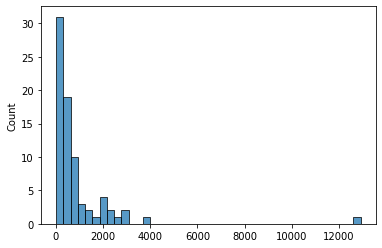

In [13]:
product_sales()